## **Dataset Analysis and Visualization**

### **Imports and Dataset Loading**

In [2]:
# Import all necessary libraries
import  numpy               as      np
import  pandas              as      pd 
import  seaborn             as      sb
import  matplotlib          as      mpl
import  matplotlib.pyplot   as      plt

# Set high-resolution matplotlib plots
mpl.rcParams['figure.dpi'] = 300

# Scikit Learn Modules
from    sklearn.pipeline        import  Pipeline
from    sklearn.linear_model    import  LinearRegression
from    sklearn.model_selection import  train_test_split
from    sklearn.compose         import  ColumnTransformer
from    sklearn.neighbors       import  KNeighborsClassifier
from    sklearn.preprocessing   import  OneHotEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler, OneHotEncoder

In [3]:
# Load dataset into Pandas dataframes
df_Data=pd.read_csv('Dataset/dataset.csv')                  # Patient disease and symptoms data
df_Desc=pd.read_csv('Dataset/symptom_Description.csv')      # Descriptions of each disease
df_Prec=pd.read_csv('Dataset/symptom_precaution.csv')       # Precautions to take for each disease
df_Sev=pd.read_csv('Dataset/symptom_severity.csv')          # Severity weight of each symptom

### **Dataset Analysis and Frequency Counts**

In [4]:
# Show header of patient disease and symptoms data
df_Data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show header of disease descriptions
df_Desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [6]:
# Show header of disease precautions
df_Prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [7]:
# Show header of symptom severity weights
df_Sev.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


### **Disease Targets and Symptom Values**

In [8]:
# For each patient, define Y_disease 'target' and X_symptoms 'value'
Y_disease = df_Data.iloc[:, [0]]
X_symptoms = df_Data.iloc[:, 1:]

In [9]:
# Show header of target array
Y_disease.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [10]:
# Show header ov value array (up to 17 symptoms available)
X_symptoms.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get number of patients (number of rows in dataset)
patient_count = len(Y_disease.index)
print("Number of Patients: \t\t", patient_count)

# Get array of unique diseases and their frequency
disease_arr = Y_disease['Disease'].value_counts()
print("Number of (Unique) Diseases: \t", len(disease_arr))

# Get array of unique symptoms along with their frequencies
symptom_arr = X_symptoms.melt(value_name="Symptom")["Symptom"].value_counts()
print("Number of (Unique) Symptoms: \t", len(symptom_arr))

# Print disease and symptom array headers
print("\n- Disease Frequencies -\n")
print(disease_arr.head())
print("\n- Symptom Frequencies -\n")
print(symptom_arr.head())

Number of Patients: 		 4920
Number of (Unique) Diseases: 	 41
Number of (Unique) Symptoms: 	 131

- Disease Frequencies -

Disease
Fungal infection       120
Hepatitis C            120
Hepatitis E            120
Alcoholic hepatitis    120
Tuberculosis           120
Name: count, dtype: int64

- Symptom Frequencies -

Symptom
fatigue             1932
vomiting            1914
high_fever          1362
loss_of_appetite    1152
nausea              1146
Name: count, dtype: int64


### **Dataset Plot Visualizations**

**Symptom Frequency**

<Axes: title={'center': 'Symptom Frequency Count (10 Most Freq.)'}>

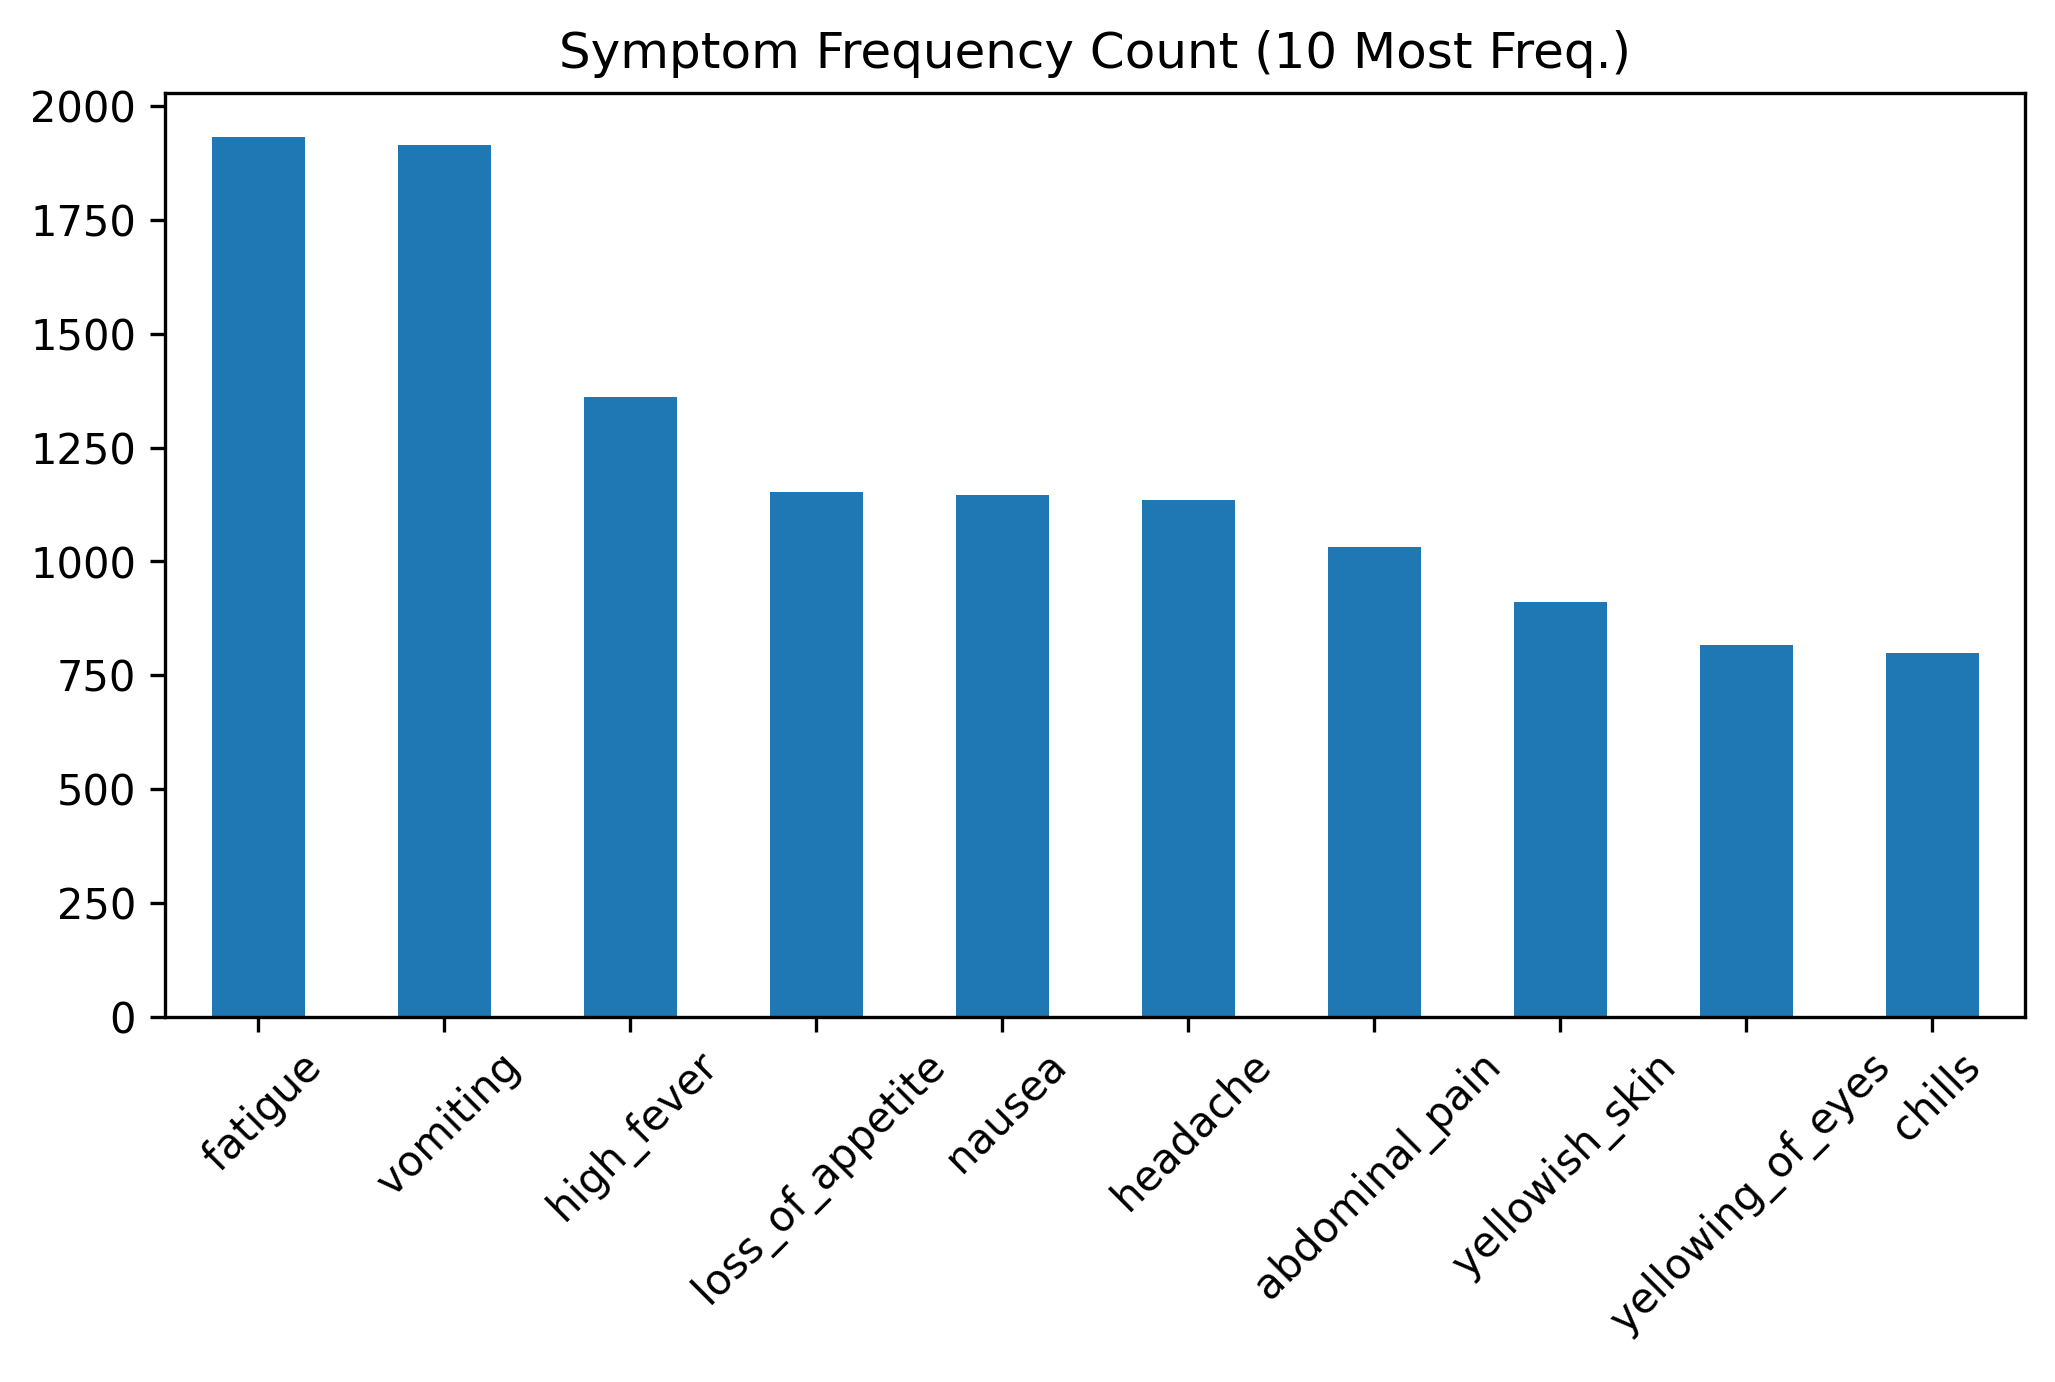

In [12]:
# Bar plot of frequency of each symptom
symptom_arr.head(10).plot(kind = 'bar',
                 title = 'Symptom Frequency Count (10 Most Freq.)',
                 xlabel = "",
                 legend = False,
                 figsize = (8, 4),
                 rot = 45,
                 )

<Axes: title={'center': 'Symptom Frequency Count (10 Least Freq.)'}>

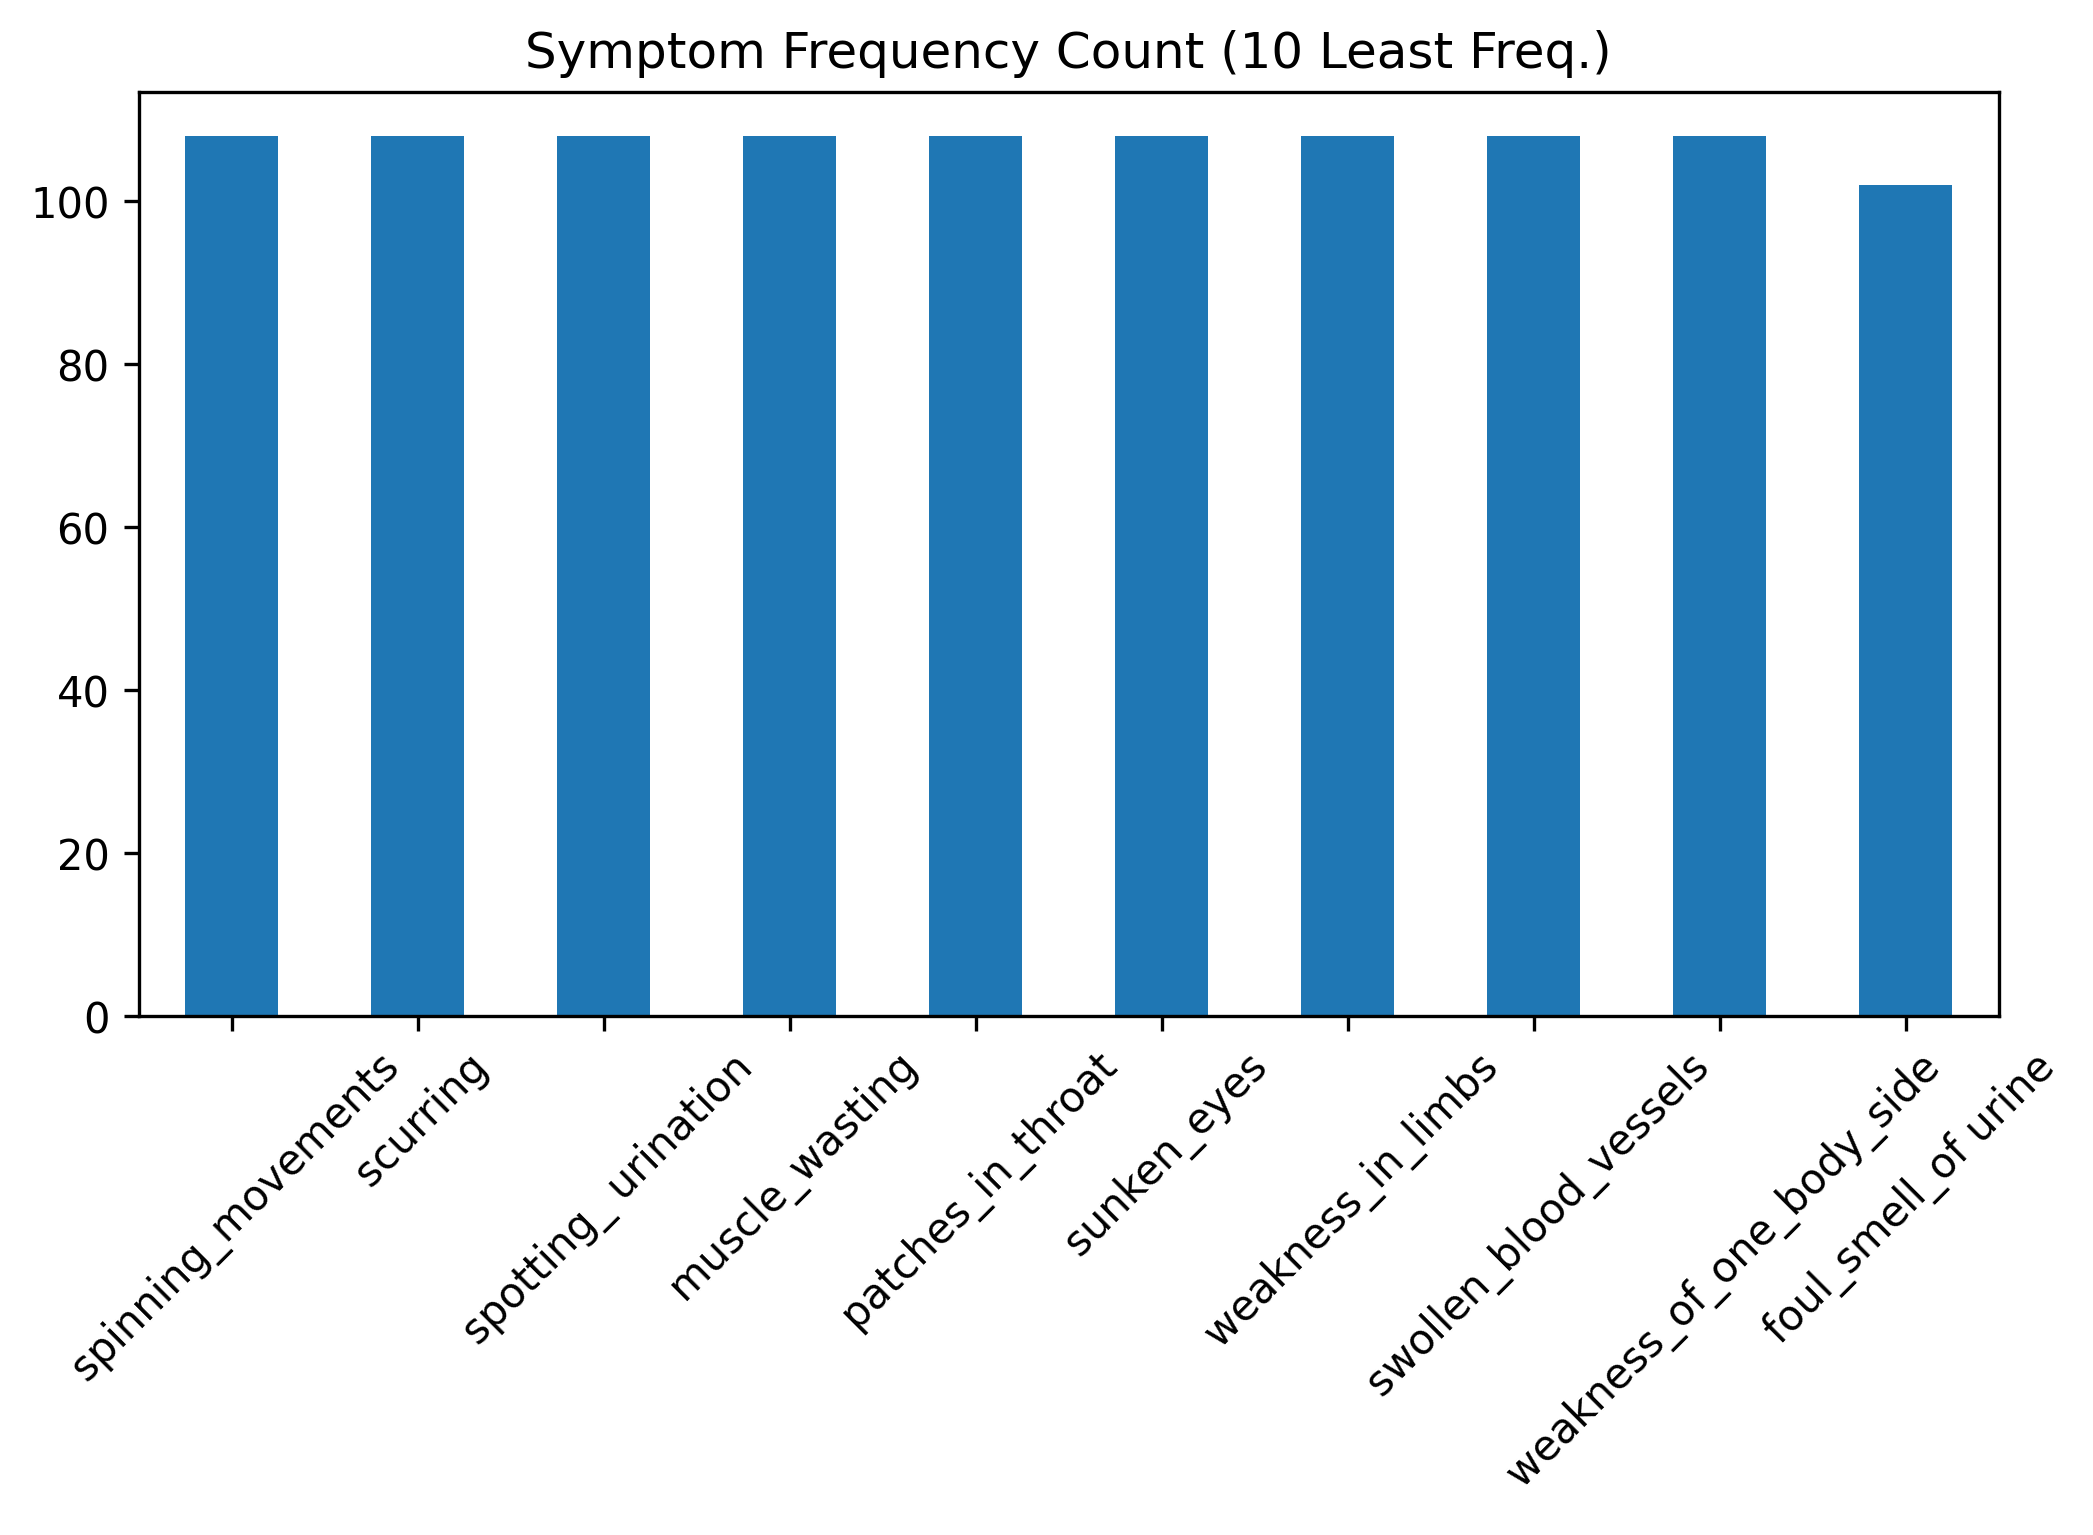

In [13]:
# Bar plot of frequency of each symptom
symptom_arr.tail(10).plot(kind = 'bar',
                 title = 'Symptom Frequency Count (10 Least Freq.)',
                 xlabel = "",
                 legend = False,
                 figsize = (8, 4),
                 rot = 45,
                 )

**Disease Frequency**

<Axes: title={'center': 'Disease Frequency Count'}>

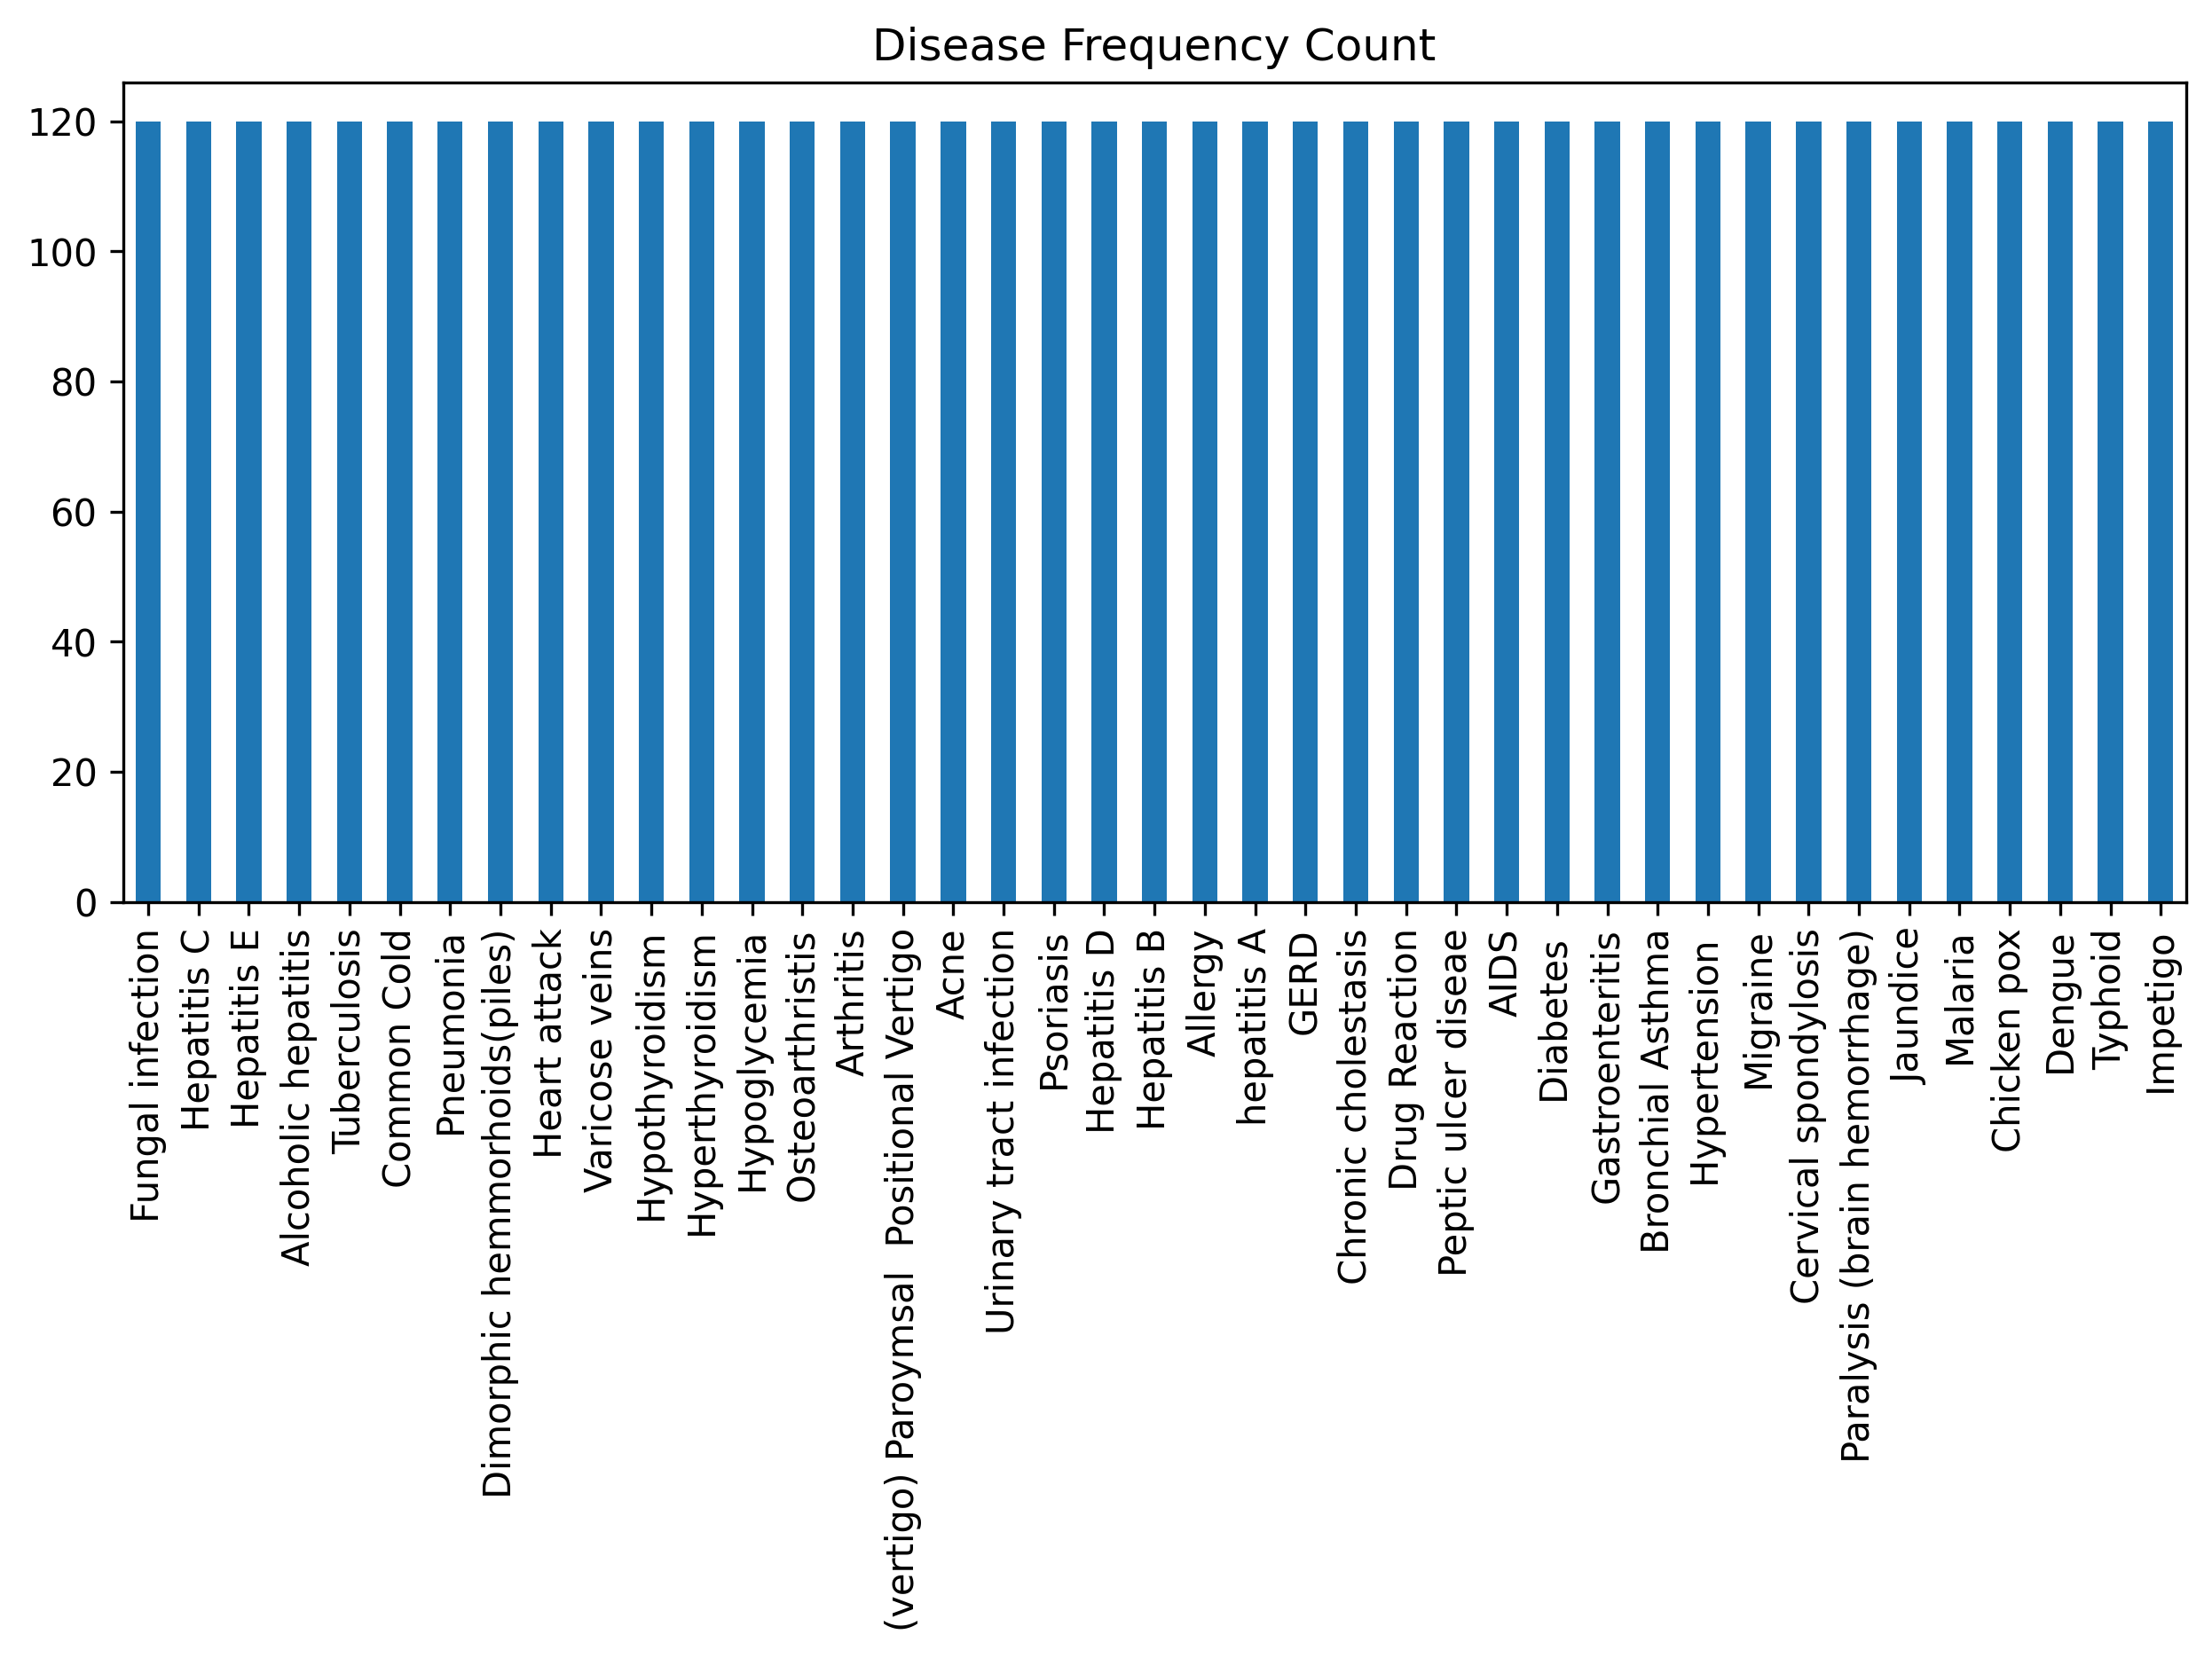

In [14]:
# Bar plot of disease frequency
disease_arr.plot( 
    kind = "bar",
    title = "Disease Frequency Count",
    xlabel = "",
    figsize = (10, 4),
    rot = 90
)

In [15]:
symptom_unique = symptom_arr.sort_values(ascending = False)
print(symptom_unique)

Symptom
fatigue                 1932
vomiting                1914
high_fever              1362
loss_of_appetite        1152
nausea                  1146
                        ... 
blackheads               108
ulcers_on_tongue         108
nodal_skin_eruptions     108
dischromic _patches      108
foul_smell_of urine      102
Name: count, Length: 131, dtype: int64


**Disease Symptom Heatmap**

                                         fatigue  vomiting  high_fever  \
Fungal infection                               0         0           0   
Allergy                                        0         0           0   
GERD                                           0       108           0   
Chronic cholestasis                            0       114           0   
Drug Reaction                                  0         0           0   
Peptic ulcer diseae                            0       114           0   
AIDS                                           0         0         114   
Diabetes                                     114         0           0   
Gastroenteritis                                0       108           0   
Bronchial Asthma                             108         0         114   
Hypertension                                   0         0           0   
Migraine                                       0         0           0   
Cervical spondylosis                  

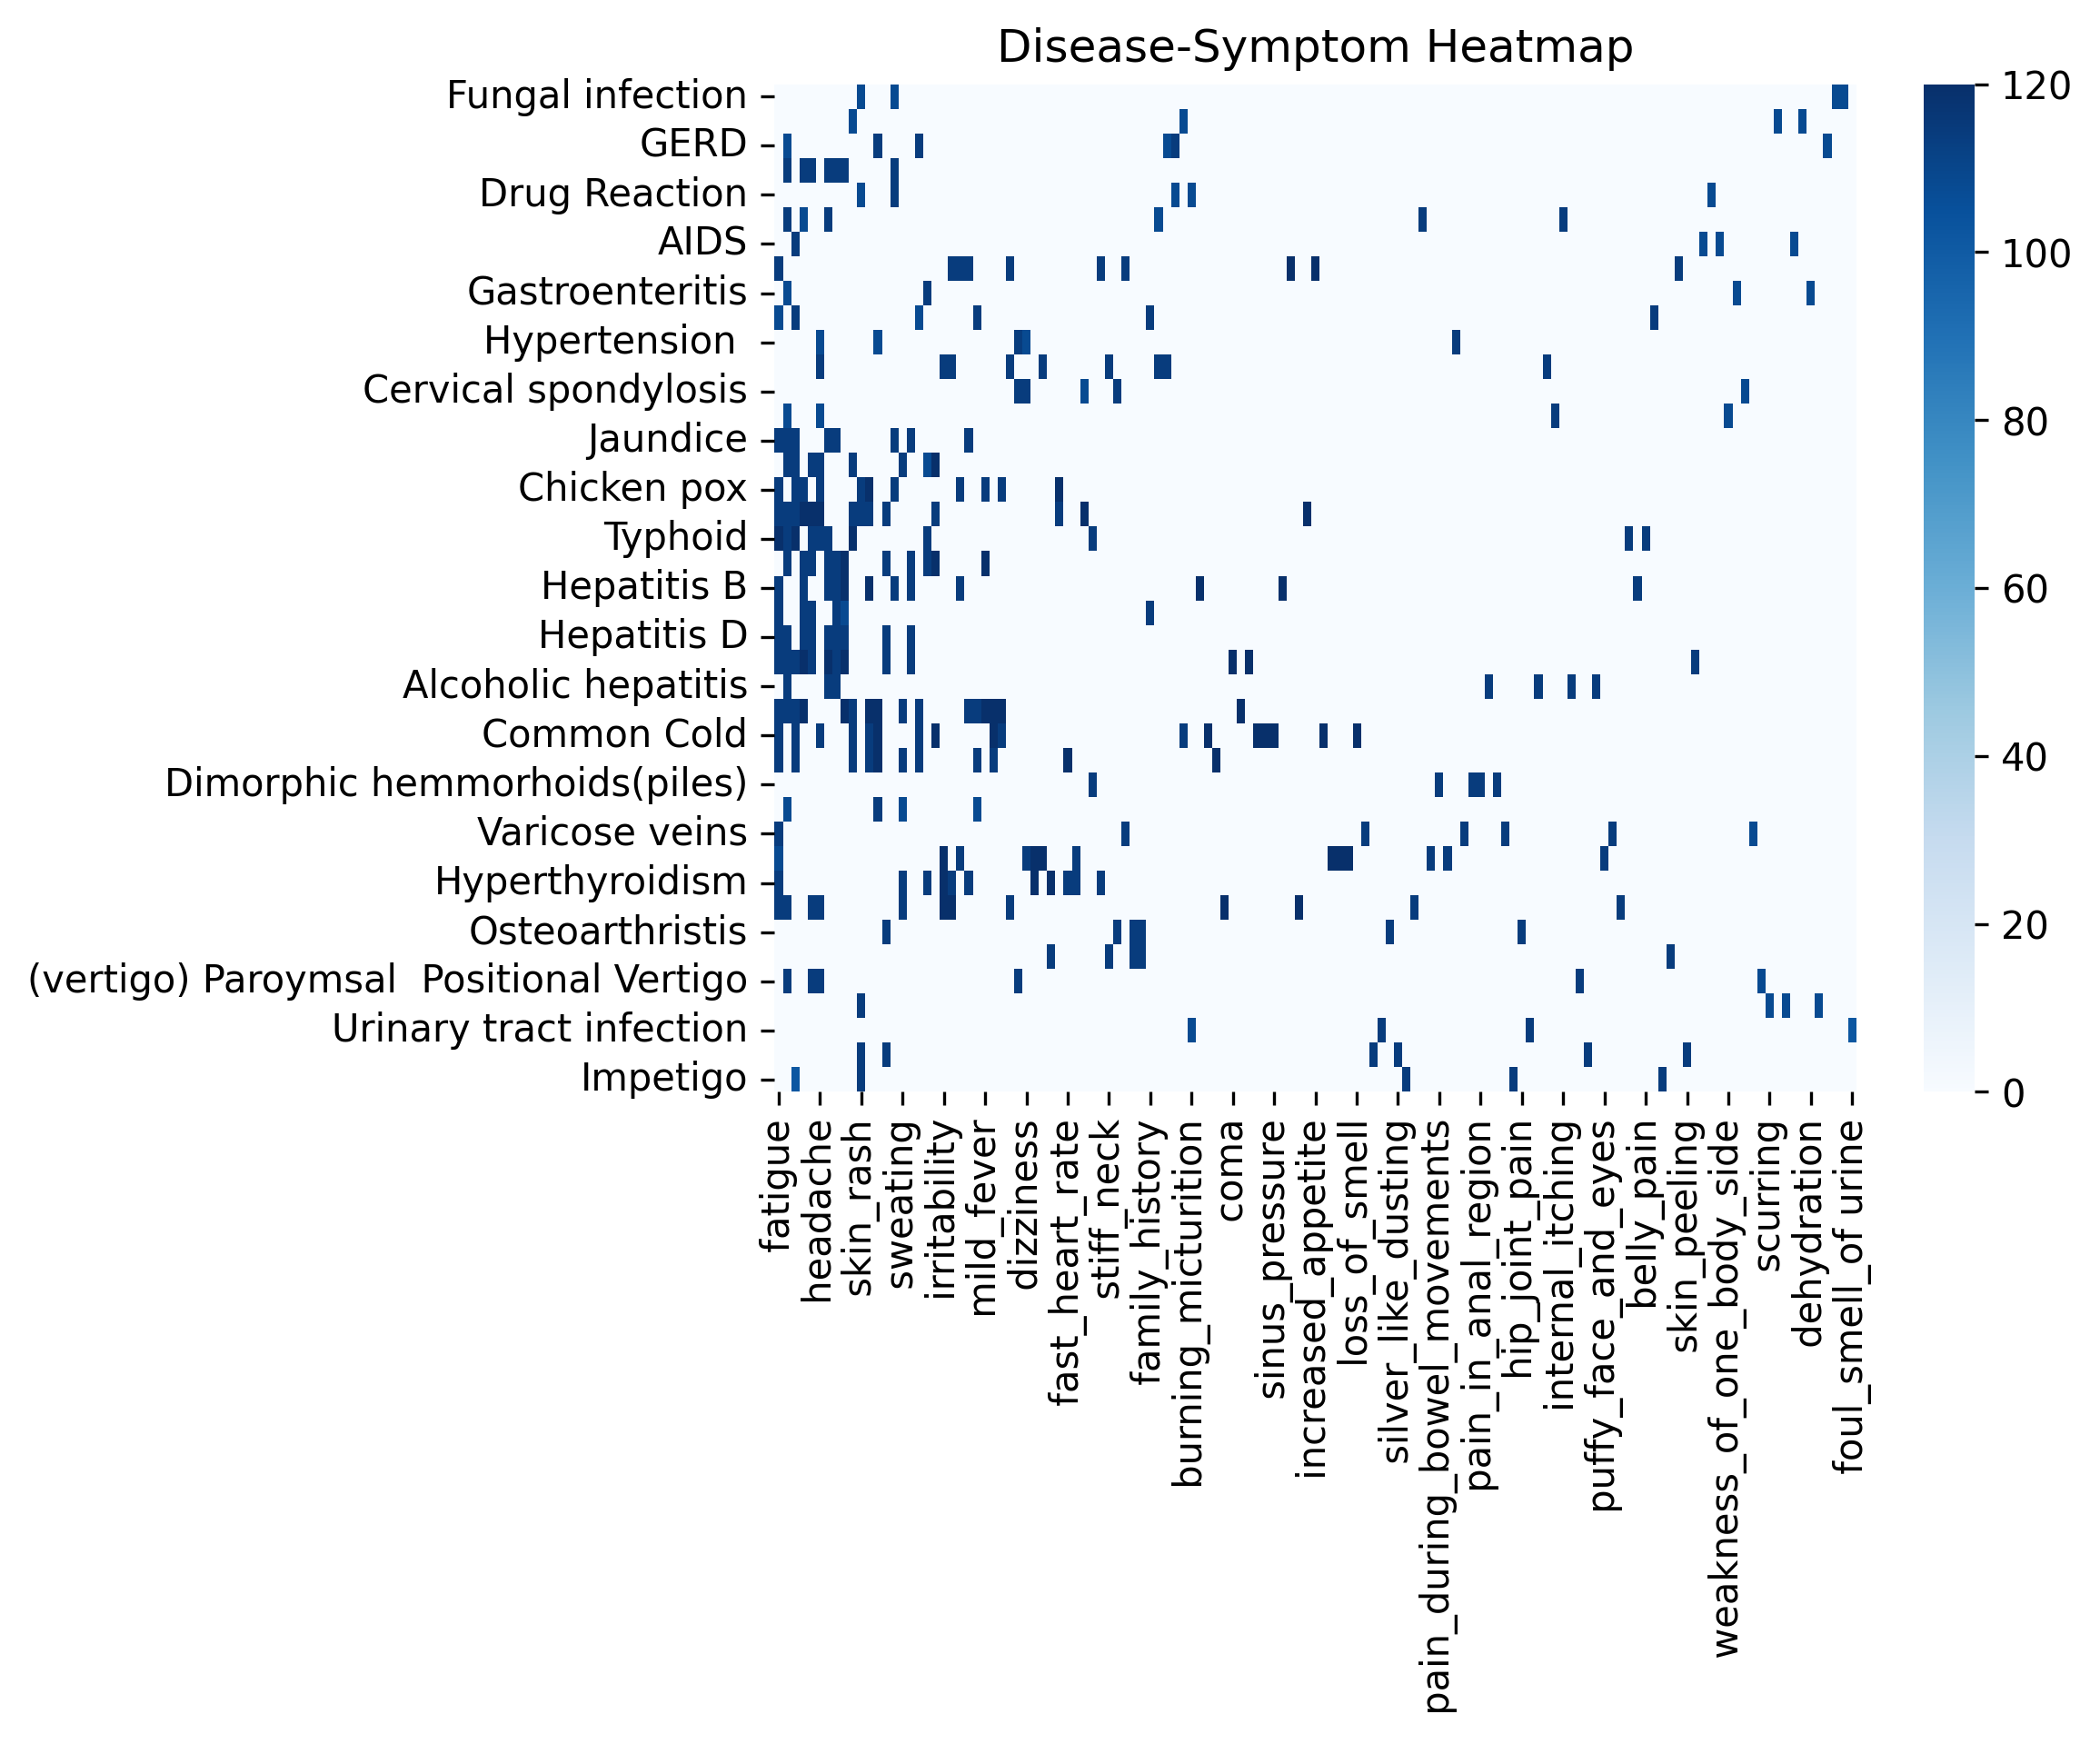

In [27]:
# Convert unique symptoms names to numpy array (first 10)
symptom_unique = symptom_arr.sort_values(ascending = False).index.to_numpy()
# Convert unique disease names to numpy array (first 10)
disease_unique = disease_arr.sort_values(ascending = False).index.to_numpy()

# Create a one-hot encoded DataFrame where rows = diseases, columns = symptoms
dissym_matrix = pd.DataFrame(0, index = disease_unique, columns = symptom_unique)

# Fill the matrix with frequency counts
for _, row in df_Data.iterrows():
    disease = row["Disease"]
    symptoms = row[1:].dropna().values  # Extract symptoms from the row
    dissym_matrix.loc[disease, symptoms] += 1

print(dissym_matrix)

# Plot heatmap
sb.heatmap(dissym_matrix, annot=False, cmap="Blues")
# Set plot title
plt.title("Disease-Symptom Heatmap")
# Show plot
plt.show()
plt.close()